In [1]:
from rdkit.Chem import MolFromSmiles, MolToSmiles, rdFMCS, MolFromSmarts
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect

In [2]:
smi_src = "COC1=CC(C[NH+]2CCC([NH+]3CCCC3)C2)=CC=C1OCC(=O)N1CCCC1"
smi_tar_1 = "COC1=CC=C(C[NH+]2CCC(C(=O)N3CCCC3)CC2)C=C1Br"
smi_tar_2 = "COC1=CC(C[NH+]2CCC(C3=CC=C(Cl)C=C3)CC2)=CC=C1OCC(=O)N1CCCC1"

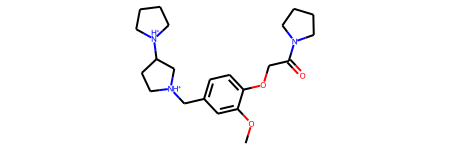

In [3]:
MolFromSmiles(smi_src)

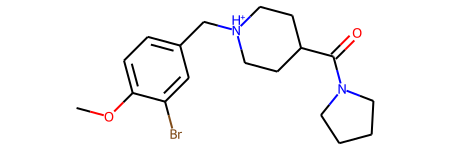

In [4]:
MolFromSmiles(smi_tar_1)

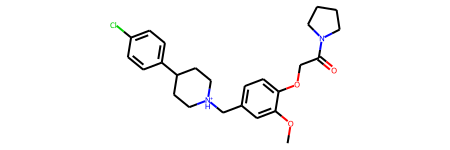

In [5]:
MolFromSmiles(smi_tar_2)

10
10


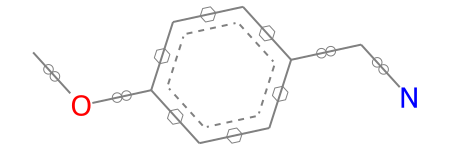

In [6]:
res = rdFMCS.FindMCS([MolFromSmiles(smi_src), MolFromSmiles(smi_tar_1)], completeRingsOnly=True)
print(res.numAtoms)
print(res.numBonds)
MolFromSmarts(res.smartsString)

19
20


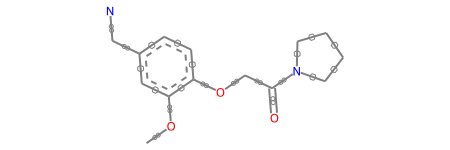

In [7]:
res = rdFMCS.FindMCS([MolFromSmiles(smi_src), MolFromSmiles(smi_tar_2)], completeRingsOnly=True)
print(res.numAtoms)
print(res.numBonds)
MolFromSmarts(res.smartsString)

In [8]:
def calc_mcs_similarity(smi_1, smi_2):
    mol_1 = MolFromSmiles(smi_1)
    mol_2 = MolFromSmiles(smi_2)
    mcs = rdFMCS.FindMCS([mol_1, mol_2], completeRingsOnly=True)
    sim_atom = 2 * mcs.numAtoms / (mol_1.GetNumAtoms() + mol_2.GetNumAtoms())
    sim_bond = 2 * mcs.numBonds / (mol_1.GetNumBonds() + mol_2.GetNumBonds())
    return sim_atom, sim_bond
    
def calc_tanimoto_similarity(smi_1, smi_2):
    if smi_1 is None or smi_2 is None: 
        return 0.0
    amol = MolFromSmiles(smi_1)
    bmol = MolFromSmiles(smi_2)
    if amol is None or bmol is None:
        return 0.0
    else:
        fp1 = GetMorganFingerprintAsBitVect(amol, 2, nBits=2048, useChirality=False)
        fp2 = GetMorganFingerprintAsBitVect(bmol, 2, nBits=2048, useChirality=False)
        return TanimotoSimilarity(fp1, fp2) 

In [9]:
sim_atom, sim_bond = calc_mcs_similarity(smi_src, smi_tar_1)
sim_fp = calc_tanimoto_similarity(smi_src, smi_tar_1)

print(f"sim_atom: {sim_atom:.3f}")
print(f"sim_bond: {sim_bond:.3f}")
print(f"sim_fp:   {sim_fp:.3f}")

sim_atom: 0.392
sim_bond: 0.357
sim_fp:   0.508


In [10]:
sim_atom, sim_bond = calc_mcs_similarity(smi_src, smi_tar_2)
sim_fp = calc_tanimoto_similarity(smi_src, smi_tar_2)

print(f"sim_atom: {sim_atom:.3f}")
print(f"sim_bond: {sim_bond:.3f}")
print(f"sim_fp:   {sim_fp:.3f}")

sim_atom: 0.644
sim_bond: 0.615
sim_fp:   0.662
